Unsupervised Learning

Unsupervised machine learning algorithm digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yang berbeda dalam kumpulan data.

# Principal Component Analysis

Principal Component Analysis (PCA) adalah teknik linear dimensionality reduction yang dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah. PCA mencoba untuk mempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.matrix([[1,2,4],
               [4,1,2],
               [5,4,8]])

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,0,1,2
0,1,2,4
1,4,1,2
2,5,4,8


## Manual Calculation

In [5]:
# Standardize data 
standard_data = (df - df.mean()) / df.std()
print(standard_data)

          0         1         2
0 -1.120897 -0.218218 -0.218218
1  0.320256 -0.872872 -0.872872
2  0.800641  1.091089  1.091089


In [6]:
# Finding covariance
covarance = np.cov(standard_data.T, bias = 1)
print(covarance)

[[0.66666667 0.27954262 0.27954262]
 [0.27954262 0.66666667 0.66666667]
 [0.27954262 0.66666667 0.66666667]]


In [7]:
# find eigen value& eigen vector
eigenvalue, eigenvectors = np.linalg.eig(covarance)

print(eigenvalue, eigenvectors)

[ 1.51710663e+00  4.82893369e-01 -9.20271082e-33] [[-4.21537439e-01 -9.06810999e-01 -5.84783617e-17]
 [-6.41212207e-01  2.98071982e-01 -7.07106781e-01]
 [-6.41212207e-01  2.98071982e-01  7.07106781e-01]]


In [8]:
# Find PCA
n_components = 2

In [9]:
pca_manual = np.matmul(np.array(standard_data),eigenvectors)
print(pca_manual)

[[ 7.52348033e-01  8.86352520e-01  2.77555756e-17]
 [ 9.84391775e-01 -8.10769054e-01 -1.11022302e-16]
 [-1.73673981e+00 -7.55834658e-02  2.22044605e-16]]


In [10]:
pca_manual  = pca_manual[:,:n_components]
print(pca_manual)

[[ 0.75234803  0.88635252]
 [ 0.98439178 -0.81076905]
 [-1.73673981 -0.07558347]]


In [11]:
print('Standardized data')
print(standard_data.round(2))
print('')

print('Covariance')
print(covarance.round(2))
print('')

print('eigen_value')
print(eigenvalue.round(4))
print('')


print('eigen_vector')
print(eigenvectors.round(4))
print('')

print('PCA manually calculated')
print(pca_manual.round(2))
print('')

Standardized data
      0     1     2
0 -1.12 -0.22 -0.22
1  0.32 -0.87 -0.87
2  0.80  1.09  1.09

Covariance
[[0.67 0.28 0.28]
 [0.28 0.67 0.67]
 [0.28 0.67 0.67]]

eigen_value
[ 1.5171  0.4829 -0.    ]

eigen_vector
[[-0.4215 -0.9068 -0.    ]
 [-0.6412  0.2981 -0.7071]
 [-0.6412  0.2981  0.7071]]

PCA manually calculated
[[ 0.75  0.89]
 [ 0.98 -0.81]
 [-1.74 -0.08]]



## Menggunakan SKlearn

In [12]:
pip install sklearn

  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=e5435bb4c1cba5d9ad8f5fe0a0bc9b9e7725f723e26ba2974ae6afd13899b815
  Stored in directory: c:\users\sapphire\appdata\local\pip\cache\wheels\36\49\c9\2374f1dee1b599effabf63d948635e6608f62d0ccde027b7e2
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.decomposition import PCA

In [14]:
# PCA
pca_sklearn = (PCA(n_components).fit_transform(standard_data))

print('PCA - sklearn')
print(pca_sklearn.round(2))

PCA - sklearn
[[-0.75  0.89]
 [-0.98 -0.81]
 [ 1.74 -0.08]]


In [15]:
print('PCA manually calculated')
print(pca_manual.round(2))

PCA manually calculated
[[ 0.75  0.89]
 [ 0.98 -0.81]
 [-1.74 -0.08]]


## Menggunakan Python (Iris Dataset)

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target'])

In [18]:
df

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Standarisasi Data**

In [19]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width','petal lenght','petal width']

In [20]:
# feature
x = df.loc[:, features].values

# target
y = df.loc[:, ['target']].values

In [21]:
# scale the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [22]:
# PCA untuk dua Komponen Utama
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [23]:
principalDataframe

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [24]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [25]:
newDataframe

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [26]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']

In [27]:
list(percent_variance)

[72.77, 23.03]

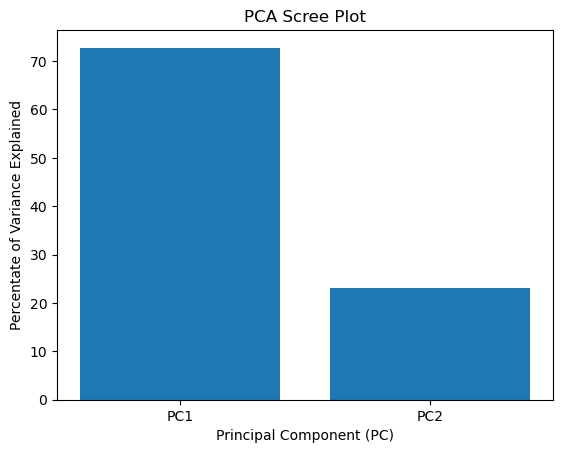

In [28]:
plt.bar(x= list(range(1,3)), height=list(percent_variance), tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component (PC)')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

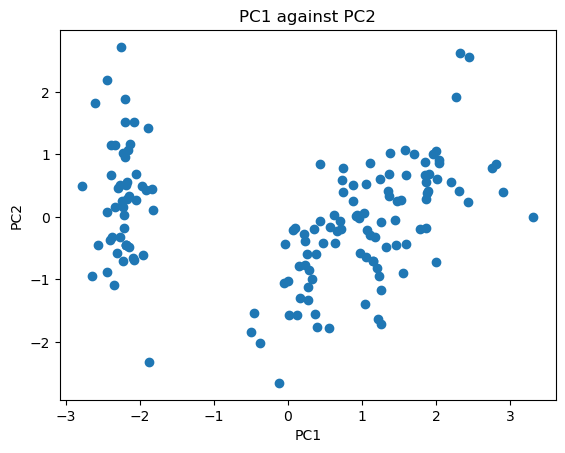

In [29]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

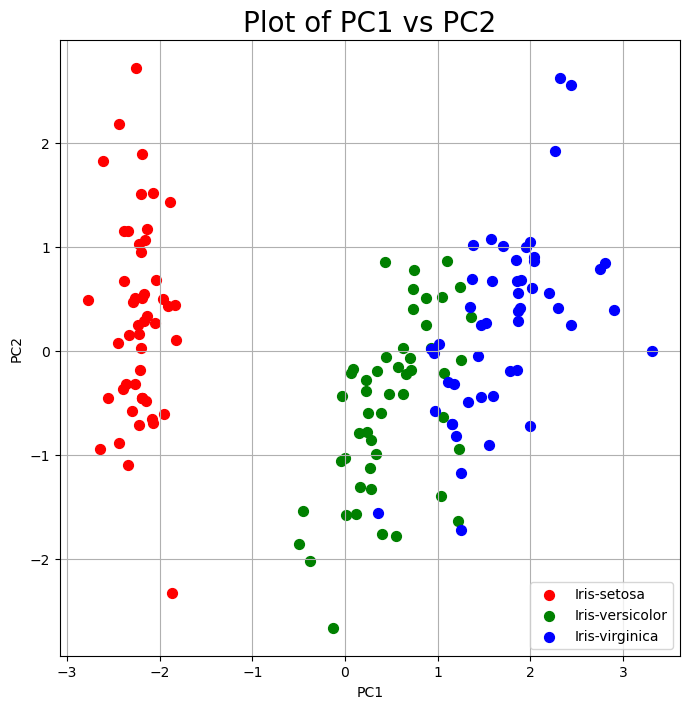

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# menyiapkan warna yang berbeda tiap target 
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [31]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## Menggunakan Python (Breast Cancer Dataset)

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [34]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [35]:
import numpy as np
import pandas as pd 

In [36]:
labels = np.reshape(breast_labels,(569,1))

In [37]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape

(569, 31)

In [38]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
features_labels = np.append(features,'label')

In [40]:
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [41]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


**Standarisasi Data**

In [42]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [43]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [44]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principalComponents_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.6720101 ],
       [-5.4752433 , -0.67063679]])

In [45]:
principal_breast_Df = pd.DataFrame(data=principalComponents_breast,
                                   columns=['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [46]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 640x480 with 0 Axes>

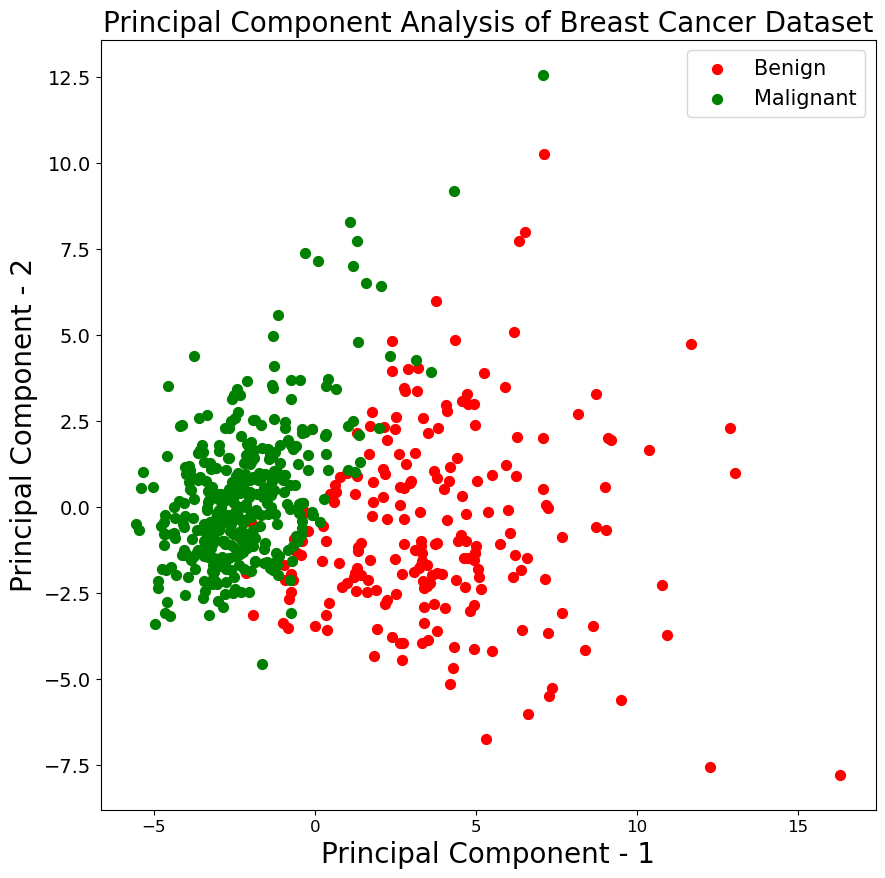

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

# K-Means Clustering

In [48]:
!pip install kneed

In [49]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [50]:
features, true_labels = make_blobs(
    n_samples=200, centers=3, cluster_std=2.75, random_state=42
)

In [51]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [52]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [53]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [54]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [55]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [56]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [57]:
# The lowest SSE value
kmeans.inertia_

74.57960106819854

In [58]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [59]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [60]:
kmeans.labels_[:5]

array([2, 0, 1, 1, 1])

In [61]:
# How to Choose the Number of Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\sapphire\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


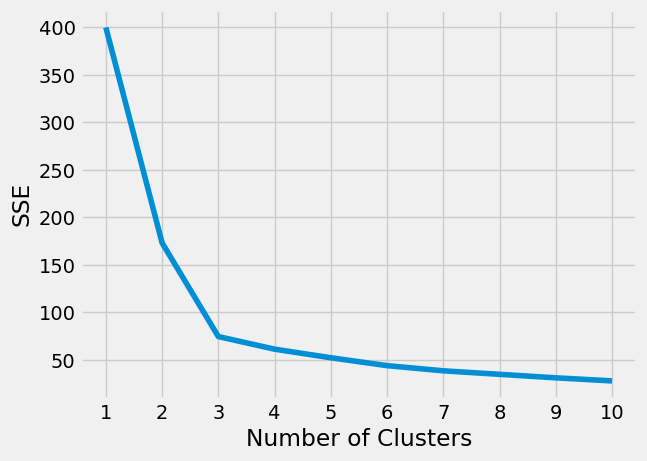

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [63]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

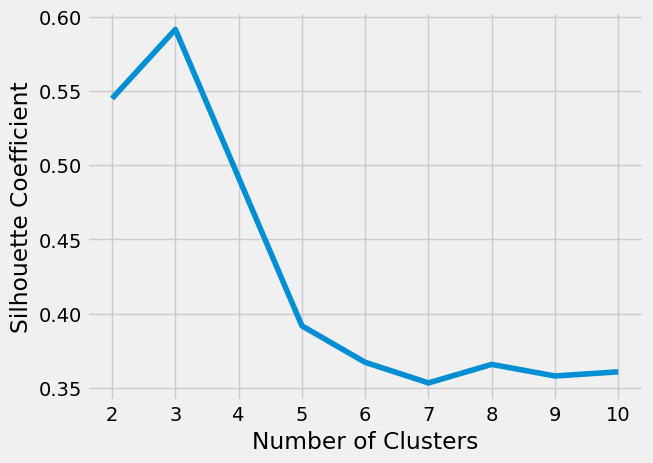

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Density Based Spatial Clustering Algorithm with Noise (DBSCAN)

Density – Based Spatial Clustering Algorithm With Noise (DBSCAN) adalah algoritma pengelompokan yang didasarkan pada kepadatan (density) data.

In [65]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 

In [66]:
bunga = datasets.load_iris()

In [67]:
print(dir(bunga))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [68]:
print(bunga.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
print(bunga.target_names)

['setosa' 'versicolor' 'virginica']


In [70]:
x_axis = bunga.data[:,0] 
y_axis = bunga.data[:,2]

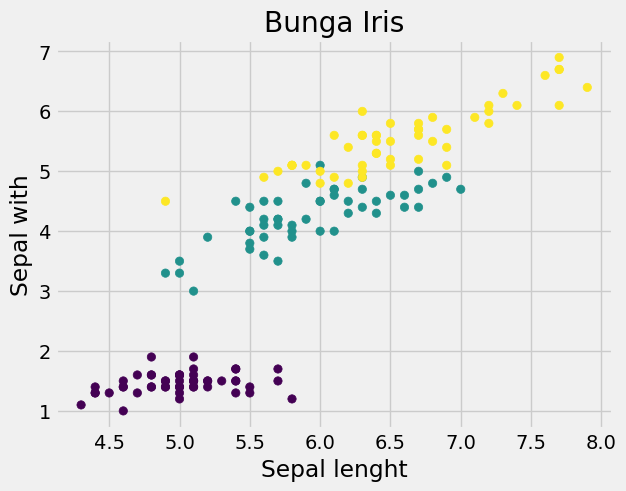

In [71]:
plt.scatter(x_axis,y_axis, c=bunga.target)
plt.xlabel("Sepal lenght")
plt.ylabel("Sepal with") 
plt.title("Bunga Iris")
plt.show()

In [72]:
# menggunakan model dbscan 
dbscan = DBSCAN() 
# ftting data
dbscan.fit(bunga.data) 

#transformasi 
pca = PCA(n_components=2).fit(bunga.data) 
pca_2d = pca.transform(bunga.data)

pca_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

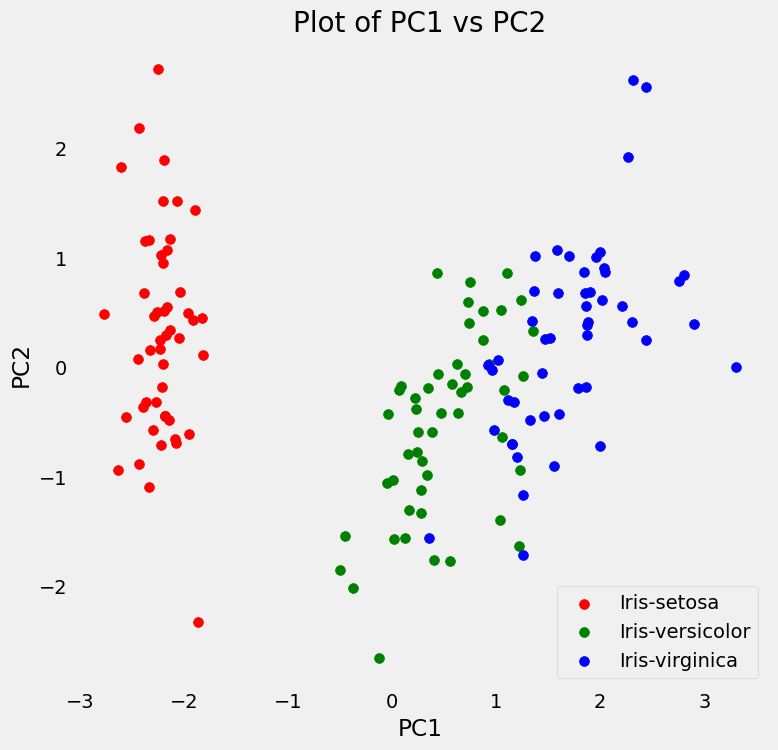

In [73]:
# visualisasi 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# menyiapkan warna yang berbeda tiap target 
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()